# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
pip install hvplot geoviews datashader


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geoviews

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities2.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
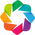

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Country,Humidity)

In [3]:
%%capture --no-display
import holoviews as hv
hv.extension('bokeh')
# Configure the map plot
hv.extension('bokeh')
map_plot_1 = city_data_df.hvplot.points(
    "Lng", #x axis
    "Lat", #y axis
    geo = True,
    tiles = "OSM", #Specifies the use of Open Street Map as the title source for the background map
    frame_width = 700,
    frame_height = 500,
    color = "Country",
    size = "Humidity",
    scale = 1.2,
    xlabel="Longitude",
    ylabel="Latitude"
)
map_plot_1
# Display the map
map_plot_1

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
city_data_df_2 = city_data_df[(city_data_df["Humidity"] > 60) & ((city_data_df["Country"] =='BR') | (city_data_df["Country"] =='AR'))]
# Drop any rows with null values
city_data_df_2.isnull().sum()
clean_city_data_df = city_data_df_2.dropna()
# Display sample data
clean_city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965
41,41,sao joao da barra,-21.6403,-41.0511,29.05,75,60,7.15,BR,1666108256
66,66,mar del plata,-38.0023,-57.5575,16.64,83,40,8.05,AR,1666108267
67,67,caravelas,-17.7125,-39.2481,26.69,64,94,4.14,BR,1666108272
77,77,jaguariaiva,-24.2511,-49.7058,18.69,81,100,2.57,BR,1666108277
100,100,castro,-24.7911,-50.0119,17.07,88,100,3.64,BR,1666108294
118,118,arraial do cabo,-22.9661,-42.0278,27.98,74,75,7.20,BR,1666108175
163,163,belmonte,-15.8631,-38.8828,26.92,65,70,4.36,BR,1666108334
193,193,maragogi,-9.0122,-35.2225,26.60,73,24,5.04,BR,1666108354


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
hotel_df = clean_city_data_df.copy()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name']=""

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231,
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965,
41,41,sao joao da barra,-21.6403,-41.0511,29.05,75,60,7.15,BR,1666108256,
66,66,mar del plata,-38.0023,-57.5575,16.64,83,40,8.05,AR,1666108267,
67,67,caravelas,-17.7125,-39.2481,26.69,64,94,4.14,BR,1666108272,
77,77,jaguariaiva,-24.2511,-49.7058,18.69,81,100,2.57,BR,1666108277,
100,100,castro,-24.7911,-50.0119,17.07,88,100,3.64,BR,1666108294,
118,118,arraial do cabo,-22.9661,-42.0278,27.98,74,75,7.20,BR,1666108175,
163,163,belmonte,-15.8631,-38.8828,26.92,65,70,4.36,BR,1666108334,
193,193,maragogi,-9.0122,-35.2225,26.60,73,24,5.04,BR,1666108354,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000
params = {
    'categories' :'accommodation.hotel',
    'limit' : 1,
    'apiKey' : geoapify_key

}
#URL = https://api.geoapify.com/v2/places?categories=accommodation.hotel&filter=circle:-68.3184972880496,-54.806115899999995,5000&bias=proximity:-68.3184972880496,-54.806115899999995&limit=20&apiKey=YOUR_API_KEY
#URL = https://api.geoapify.com/v2/places?categories=accommodation.hotel&filter=circle:-68.3184972880496,-54.806115899999995,10000&bias=proximity:-68.3184972880496,-54.806115899999995&limit=20&apiKey=YOUR_API_KEY


# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    lat = row['Lat']
    lng = row['Lng']
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f'circle:{lng},{lat},{radius}'
    params["bias"] = f'proximity:{lng},{lat}'

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places?"


    # Make and API request using the params dictionaty
    name_address = requests.get(base_url,params=params)
    #print(name_address.request.url)
    # Convert the API response to JSON format
    name_address = name_address.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
ushuaia - nearest hotel: Apart Hotel Aires del Beagle
colorado - nearest hotel: Servilha Park Hotel
sao joao da barra - nearest hotel: Pousada Mediterrâneo
mar del plata - nearest hotel: Nuevo Ostende
caravelas - nearest hotel: Pousada dos Navegantes
jaguariaiva - nearest hotel: No hotel found
castro - nearest hotel: Hotel Central Palace
arraial do cabo - nearest hotel: No hotel found
belmonte - nearest hotel: No hotel found
maragogi - nearest hotel: Pousada Mariluz
touros - nearest hotel: Pousada Atlântico
ladario - nearest hotel: Hotel Rios
rio grande - nearest hotel: Hotel Vila Moura Executivo
cidreira - nearest hotel: Hotel Castelo
juruti - nearest hotel: No hotel found
vila velha - nearest hotel: Hotel Prainha
moron - nearest hotel: La Esquina
cabedelo - nearest hotel: No hotel found
veinticinco de mayo - nearest hotel: Jorly
terra santa - nearest hotel: Hotel Novo Horizonte
bataipora - nearest hotel: Hotel Estoril
ilhabela - nearest hotel: Vila Kebaya


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231,Apart Hotel Aires del Beagle
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965,Servilha Park Hotel
41,41,sao joao da barra,-21.6403,-41.0511,29.05,75,60,7.15,BR,1666108256,Pousada Mediterrâneo
66,66,mar del plata,-38.0023,-57.5575,16.64,83,40,8.05,AR,1666108267,Nuevo Ostende
67,67,caravelas,-17.7125,-39.2481,26.69,64,94,4.14,BR,1666108272,Pousada dos Navegantes
77,77,jaguariaiva,-24.2511,-49.7058,18.69,81,100,2.57,BR,1666108277,No hotel found
100,100,castro,-24.7911,-50.0119,17.07,88,100,3.64,BR,1666108294,Hotel Central Palace
118,118,arraial do cabo,-22.9661,-42.0278,27.98,74,75,7.20,BR,1666108175,No hotel found
163,163,belmonte,-15.8631,-38.8828,26.92,65,70,4.36,BR,1666108334,No hotel found
193,193,maragogi,-9.0122,-35.2225,26.60,73,24,5.04,BR,1666108354,Pousada Mariluz


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
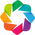

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Country,Humidity,Hotel Name,City)

In [7]:
%%capture --no-display


# Configure the map plot
hv.extension('bokeh')
map_plot_2 = hotel_df.hvplot.points(
    "Lng", #x axis
    "Lat", #y axis
    geo = True,
    tiles = "OSM", #Specifies the use of Open Street Map as the title source for the background map
    frame_width = 700,
    frame_height = 500,
    color = "Country",
    size = "Humidity",
    scale = 1.2,
    xlabel="Longitude",
    ylabel="Latitude",
    hover_cols=['Hotel Name','City']
)


# Display the map
map_plot_2